#### Objective: 
The objective is to develop a predictive model that can accurately estimate health insurance charges for individuals, based on their demographic and health-related information.

### Data Dictionary 
Age: Numeric variable representing the age of the individual in years.

Sex: Categorical variable indicating the gender of the individual. Possible values could be "Male" or "Female".

BMI (Body Mass Index): Numeric variable representing the Body Mass Index of the individual, calculated as weight (kg) divided by height (m) squared.

Number of Children: Numeric variable representing the number of children/dependents covered by the insurance.

Smoker: Categorical variable indicating whether the individual is a smoker or not. Possible values could be "Yes" or "No".

Region: Categorical variable indicating the geographic region of the individual's residence. Possible values could be "Northeast", "Northwest", "Southeast", or "Southwest".

Charges: Numeric variable representing the medical insurance charges/costs associated with the individual's insurance policy. This could be in any currency (e.g., USD).

#### This is a regression problem because we're predicting a continuous variable (insurance charges) based on input features.

##### Possible algorithms to consider for regression include:
Linear Regression
Decision Tree Regressor
Random Forest Regressor etc.

## Approach

- Get the requited dataset

- Conduct EDA to understand the distribution of variables, identify correlations, and gain insights into the dataset. Visualize distributions, check for outliers, and explore relationships between features and the target variable.

- Handle missing values by Impute or drop missing values if necessary.
-  Encode categorical columns: Use label encoding or one-hot encoding for categorical variables like sex and region.
 - Standardize or normalize numerical features like age, BMI, and number of children to ensure uniformity in feature scales if necessary


- Model Training and Model Evaluation


In [2]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


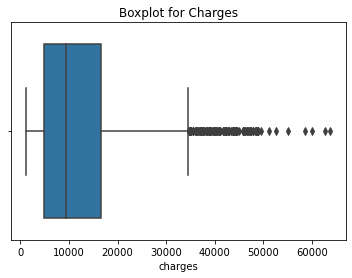

In [9]:
sb.boxplot(x=df['charges'])
plt.title('Boxplot for Charges')
plt.show()

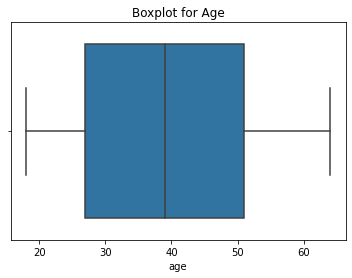

In [10]:
sb.boxplot(x=df['age'])
plt.title('Boxplot for Age')
plt.show()



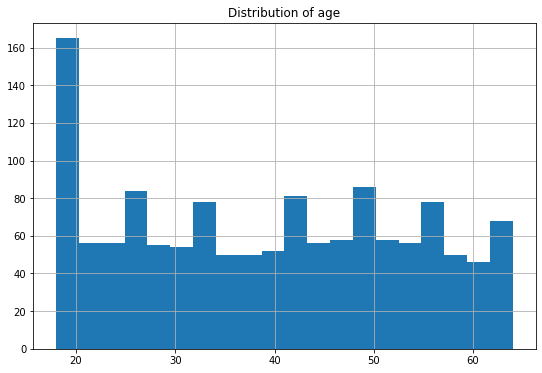

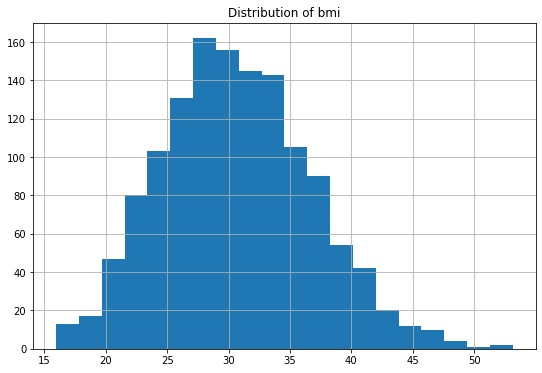

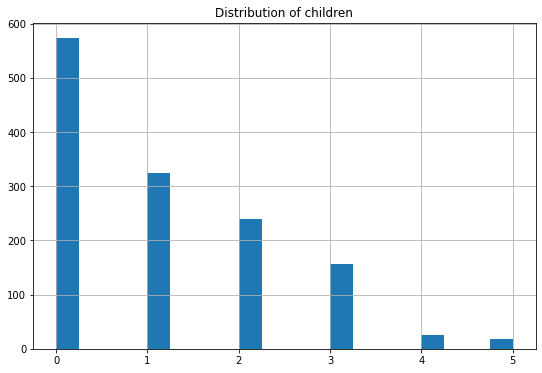

In [11]:
numeric_features = ['age', 'bmi', 'children']


# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
plt.show()

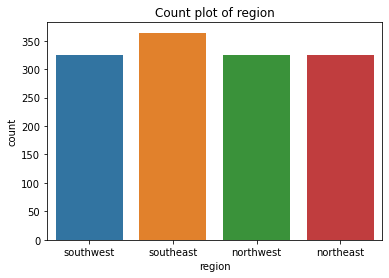

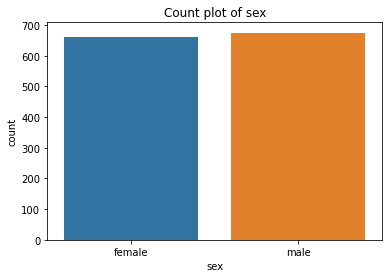

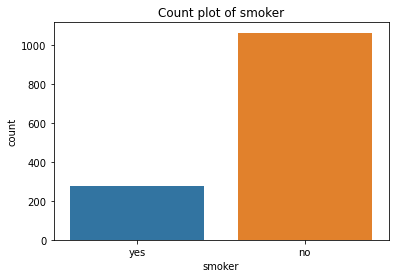

In [12]:
categorical_features = ['region', 'sex','smoker']

for col in categorical_features:
    sb.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

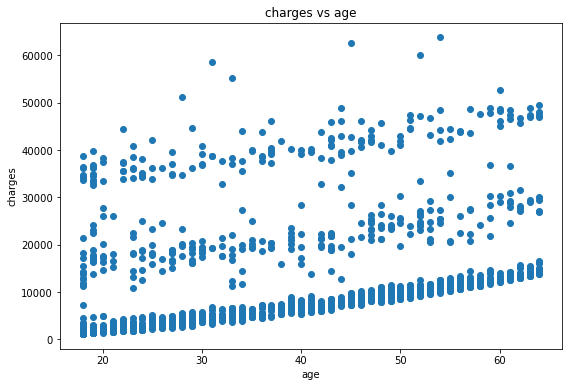

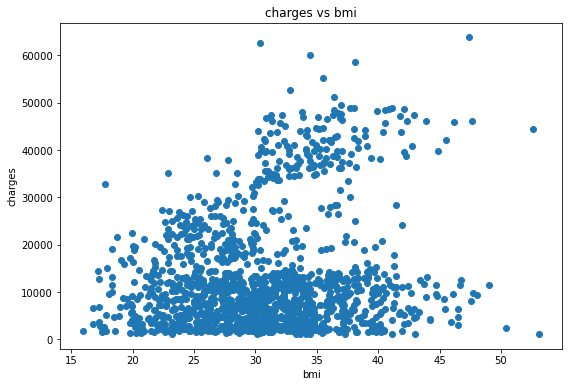

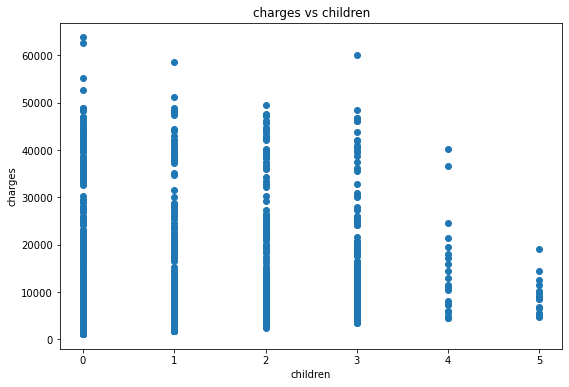

In [13]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    feature = df[col]
    label = df['charges']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.title(f'charges vs {col}')
plt.show()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


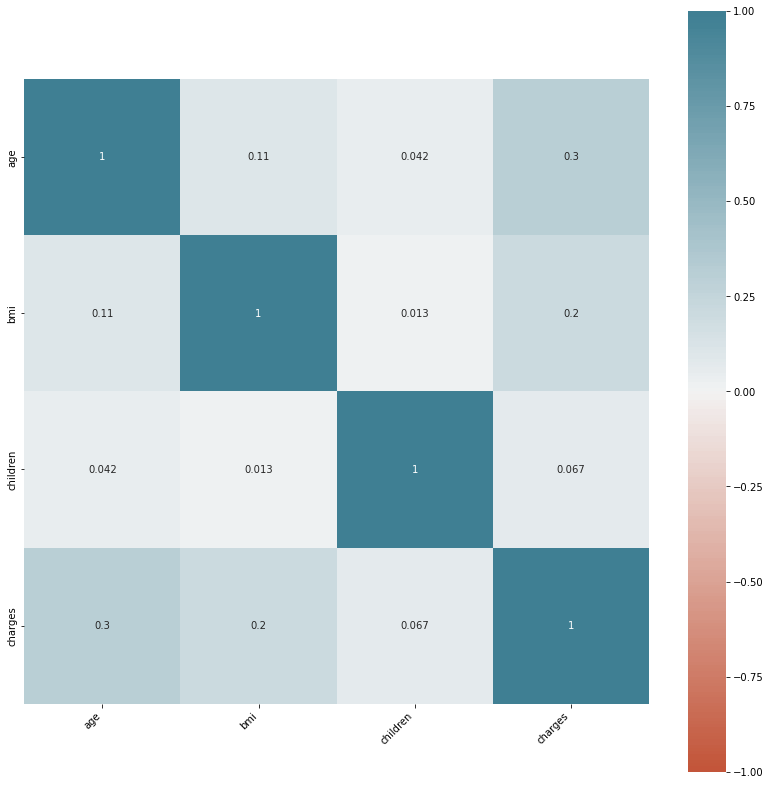

In [14]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sb.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

corr

In [15]:
for i in categorical_features:
    print(df[i].value_counts())
    print('--------------------')

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
--------------------
male      675
female    662
Name: sex, dtype: int64
--------------------
no     1063
yes     274
Name: smoker, dtype: int64
--------------------


### Feature selection and data spliting

In [16]:
X = df.drop('charges', axis=1)
y = df.loc[:, 'charges']

In [17]:
X['sex'] = X['sex'].replace(
{'female' : 0, 'male': 1})

X['region'] = X['region'].replace({
    'northeast' : 0,
    'northwest' : 1,
    'southeast' : 2,
    'southwest' : 3
})

X['smoker'] = X['smoker'].replace({
    'yes' : 1,
    'no' : 0
})

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1069, 6), (1069,), (268, 6), (268,))

### Model Building

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)

In [21]:
predictions = lin_reg.predict(X_test)
predictions

array([ 3.62567500e+04,  3.37111225e+04,  2.86826843e+04,  2.71471657e+04,
        1.27022848e+04,  7.21889307e+03,  5.50986991e+03,  9.96430170e+03,
        3.43177459e+04,  1.15218552e+04,  3.43696868e+04,  9.81685068e+03,
        3.20524622e+04,  1.17573596e+04,  1.43354257e+04,  3.60676978e+04,
        1.19617611e+04,  1.22847346e+04,  2.91330695e+04,  1.11661351e+04,
        1.74886375e+03,  9.08545928e+03,  7.46635416e+03,  1.15136005e+04,
        3.33454315e+04,  3.93649266e+04,  1.51583446e+04,  3.91694992e+03,
        1.14140280e+04,  1.53720852e+04,  2.31023582e+03,  8.53593643e+03,
        3.24061385e+04,  1.04462625e+04,  8.67139715e+03,  1.10584108e+04,
        1.94440850e+03,  7.21396891e+03,  1.00281405e+03,  8.29333654e+03,
        7.57537173e+03,  3.50205892e+04,  3.12852707e+03,  1.46611533e+04,
        2.99181181e+04,  2.38803429e+04,  7.26894293e+03,  3.20951499e+03,
        3.14934532e+03,  4.98627606e+03,  1.11428584e+04,  1.30132354e+04,
        8.61470320e+03,  

In [22]:

from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 36423084.81321244
RMSE: 6035.154083634687
R2: 0.7457961701917712


In [23]:
r2 = r2_score(y_train, lin_reg.predict(X_train))
print("R2:", r2)

R2: 0.7512008926715853


### Polynomial Regression

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [26]:
#Select features using select Kbest
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(k=4).fit_transform(X, y)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [27]:
X_new

array([[27.9 ,  0.  ,  1.  ,  3.  ],
       [33.77,  1.  ,  0.  ,  2.  ],
       [33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [36.85,  0.  ,  0.  ,  2.  ],
       [25.8 ,  0.  ,  0.  ,  3.  ],
       [29.07,  0.  ,  1.  ,  1.  ]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 4), (268, 4), (1069,), (268,))

## Polynomial regresssion

In [29]:
from sklearn.preprocessing import PolynomialFeatures
\)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)



In [30]:
lin_reg2 = LinearRegression().fit(X_train_poly,y_train)


In [31]:
y_predicted = lin_reg2.predict(X_test_poly)

In [32]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_predicted)
print("R2:", r2)

MSE: 35576495.44666975
RMSE: 5964.603544802433
R2: 0.7517046828933645


In [33]:

r2 = r2_score(y_train, lin_reg2.predict(X_train_poly))
print("R2:", r2)


R2: 0.7508773101137928


### Train the model with scaled features

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [36]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)


In [37]:
lin_reg3 = LinearRegression().fit(X_train_scaled,y_train)


In [38]:
y_predicted = lin_reg3.predict(X_test_scaled)

In [39]:

mse = mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_predicted)
print("R2:", r2)

MSE: 36423084.81321244
RMSE: 6035.154083634687
R2: 0.7457961701917712


## Decision tree regressor

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [52]:
X_train

,age,sex,bmi,children,smoker,region
1050,44,0,36.955,1,0,1
436,22,1,31.730,0,0,0
671,29,0,31.160,0,0,0
573,62,0,36.860,1,0,0
977,26,1,29.150,1,0,2
...,...,...,...,...,...,...
920,62,0,25.000,0,0,3
1165,35,0,26.125,0,0,0
500,29,1,34.400,0,1,3
942,18,0,40.185,0,0,0


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

DecisionTreeRegressor() 



In [54]:
predictions =model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 49704523.83518277
RMSE: 7050.143532949011
R2: 0.6531024106691126


In [56]:
r2 = r2_score(y_train, model.predict(X_train))
print("R2:", r2)

R2: 0.9983402217594154


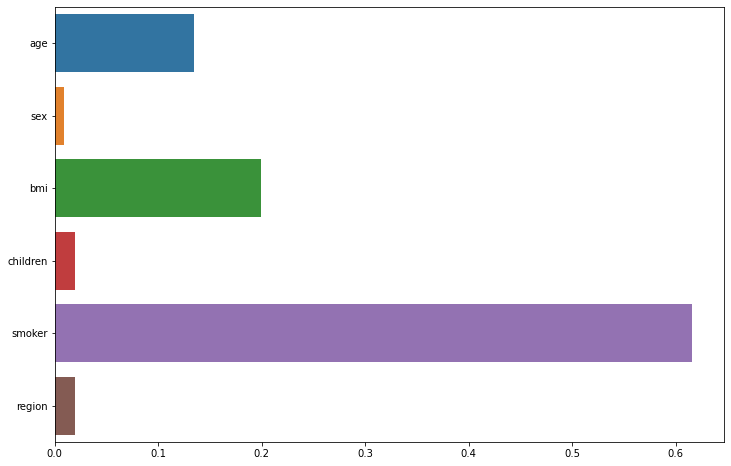

In [59]:
# feature importance

plt.figure(figsize=(12,8))

importance = model.feature_importances_

sb.barplot(x=importance, y=X.columns)
plt.show()